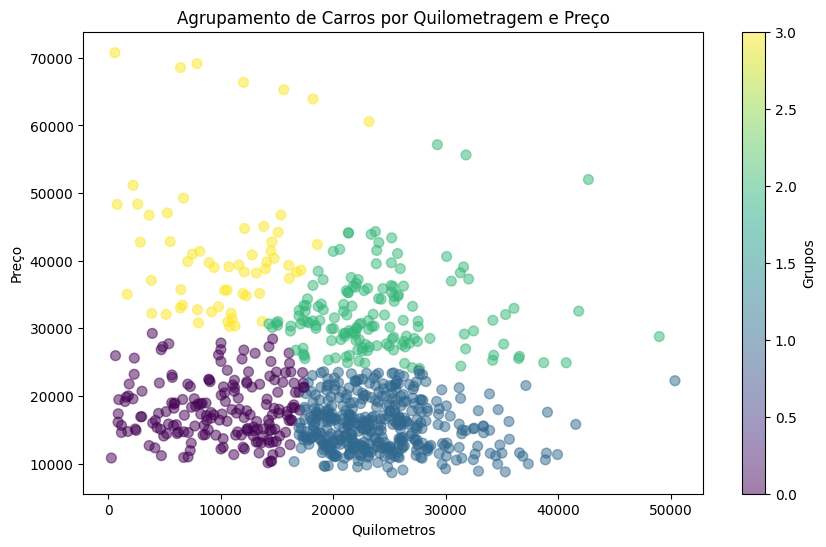

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar os dados de carros do arquivo Excel
df = pd.read_excel('cars.xls')

# Selecionar as features para o agrupamento (preço e quilometragem)
X = df[['Mileage', 'Price']]

# Padronizar os dados para facilitar o agrupamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar o modelo K-Means com 4 clusters (grupos)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Adicionar os rótulos de cluster de volta ao dataframe original
df['Grupos'] = kmeans.labels_

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], c=df['Grupos'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Quilometros')
plt.ylabel('Preço')
plt.title('Agrupamento de Carros por Quilometragem e Preço')
plt.colorbar(label='Grupos')
plt.show()

In [17]:
cluster_means = df.groupby('Grupos').agg({
    'Mileage': 'mean',
    'Price': 'mean'
}).reset_index()

In [15]:
print(cluster_means)

   Cluster       Mileage         Price
0        0  10053.516304  18032.250574
1        1  24149.586207  15733.005458
2        2  23966.732026  32068.118434
3        3  10219.442623  41769.363064
